### Import files

In [1]:
from control import PedestrianController
from run import *

%load_ext autoreload
%autoreload 2

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Task 1

In [7]:
runsim('./Test_Cases/task1.dat')

# Task 2

A pedestrian at (5, 25) walks towards a target at (25, 25).
It performs 25 steps so in the mean-time reaching its target.

In [8]:
runsim('./Test_Cases/task2.dat')

KeyboardInterrupt: 

# Task 3

5 pedestrians are located in a circle with radius 30m around the target.
In case of non-absorbing targets, only one pedestrian claims the target while the others gather around.

In [ ]:
runsim('./Test_Cases/task3_without_devour.dat')

In case of absorbing targets, all pedestrians eventually reach the target, one-by-one.

In [ ]:
runsim('./Test_Cases/task3_with_devour.dat')

# Task 4

When using the standard distance-based cost function, the pedestrians fail the chicken-test and get stuck in the cage.

In [ ]:
runsim('./Test_Cases/task4_standard.dat')

error: display Surface quit

The dijkstra-algorithm solves this ptoblem. All pedestrians avoid the obstacle and reach their target.
This is visualized by the overlayed cost-function flowing around the obstacle.

In [ ]:
runsim('./Test_Cases/task4_dijkstra.dat')

error: display Surface quit

The corridor example for this task has been implemented as code instead of file since there are multiple obstacles.

In [ ]:
in_val = input('Implement dijkstra? y/n:')
if in_val == 'y':
    dijkstra = True
elif in_val == 'n':
    dijkstra = False
else:
    print("ERROR: Invalid value. Write 'y' or 'n'")
    exit()

pedestrian_loc = [(5, 23), (3, 27), (7, 32)]

obstacles_loc = [(x, 20) for x in range(0, 20)] + [(x, 35) for x in range(0, 20)] + [(20, y) for y in range(20, 26)] + [(20, y) for y in range(30, 36)] + [(x, 20) for x in range(30, 50)] + [(x, 35) for x in range(30, 50)] + [(30, y) for y in range(20, 26)] + [(30, y) for y in range(30, 36)] + [(x, 30) for x in range(20, 30)] + [(x, 28) for x in range(20, 30)] + [(x, 25) for x in range(20, 30)] + [(29,29)]

targets_loc = [(40, 28)]

controller = PedestrianController(50, 50, pedestrian_loc,  
                                    targets_loc, obstacles_loc, None, [1.3], 100, True, dijkstra, True, True)
controller.init_costs()
controller.run()

# Task 5
## Test 1: RiMEA scenario 1

In [ ]:
from numpy.random import default_rng
import random
import matplotlib.pyplot as plt

times=[]
speeds=[]
times_expected=[]
hallway_distance =5

#Run a series of simulations and record the time pedestrian takes to reach target 
#starting with a speed between 1.2 and 1.4 m/s
for i in range (0,1):

    width = 50
    height = 10

    pedestrian_loc = [(1,5)]

    obstacles_loc = [(x, 4) for x in range(1, hallway_distance)] + [(x, 7) for x in range(1, hallway_distance)]

    targets_loc = [(hallway_distance, y) for y in range(5, 7)]

    speed = []
    num = random.uniform(1.2, 1.4)
    speed.append(num)
    speeds.append(num)
    
    #Create expected value for speed and time    
    times_expected.append((hallway_distance-1)/num)
   

    points = None

    controller = PedestrianController(width, height, pedestrian_loc,  
                                    targets_loc, obstacles_loc, points, speed, 10000, True, True, True,True)

    controller.init_costs()
    controller.run()
    times.append(controller.elapsed_time)
    
 
#Running the 1.33 m/s verification run and add to the rest of the collected data

controller = PedestrianController(width, height, pedestrian_loc,  
                                    targets_loc, obstacles_loc, points, [1.33], 10000, True, True, True)
speeds.append(1.33)

#Create expected values for speed and time 
times_expected.append((hallway_distance-1)/1.33)

controller.init_costs()
controller.run()
times.append(controller.elapsed_time)

#Create a plot to analyze results

#plotting the expected values
plt.plot(speeds, times_expected, label = "expected values")
# plotting points as a scatter plot
plt.scatter(speeds, times, label= "stars", color= "red",marker= "*", s=50)
# naming the x axis
plt.xlabel('Walking Speed')
# naming the y axis
plt.ylabel('Target Arrival Time (s)')    

SystemExit: 

C:\Users\Laptop\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## Test 2: RiMEA scenario 4

[[13.493810316000587, 0.32894736842105265], [13.55561990650726, 0.3157894736842105], [12.927485729247364, 0.3026315789473684], [12.881005517793325, 0.2894736842105263], [12.312177678207249, 0.27631578947368424], [11.955796972557819, 0.2631578947368421], [12.676831475191827, 0.25], [13.042602435624309, 0.23684210526315788], [12.066222477363448, 0.2236842105263158], [13.288972378113248, 0.21052631578947367], [13.407663647390578, 0.19736842105263158], [11.944937090713001, 0.18421052631578946], [8.03483040006973, 0.17105263157894737], [12.702094482318143, 0.15789473684210525], [13.318747493389534, 0.14473684210526316], [8.33926042642662, 0.13157894736842105], [6.137919473669847, 0.11842105263157894], [10.406959801254873, 0.10526315789473684], [11.302205926141099, 0.09210526315789473], [5.38429791161123, 0.07894736842105263], [7.194263188204939, 0.06578947368421052]]


TypeError: 'numpy.float64' object cannot be interpreted as an integer

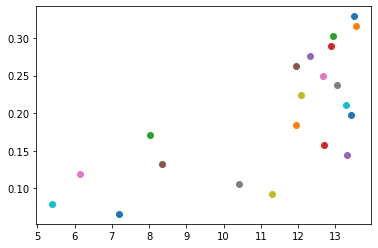

In [94]:
from numpy.random import default_rng
import random
import matplotlib.pyplot as plt
import numpy

rng = default_rng()
size_pedestrians = 25
pedestrian_loc = rng.choice([(x, y) for x in range(50, 65) for y in range(3, 8)], size=size_pedestrians, replace=False)

obstacles_loc = [(x, 2) for x in range(1, 148)] + [(x, 8) for x in range(1, 148)]

targets_loc = [(148, y) for y in range(4, 6)]

speed = []
for i in range(0, size_pedestrians):
    num = random.uniform(0.6, 0.7)
    speed.append(num)

points = [(75, 5), (75, 6), (68, 5)]

areas = [[(1, 7), (25, 3)], [(26, 7), (45, 3)], [(46, 7), (65, 3)], [(66, 7), (85, 3)], [(86, 7), (105, 3)], [(106, 7), (125, 3)], [(126, 7), (146, 3)]]

controller = PedestrianController(150, 11, pedestrian_loc, 
                                    targets_loc, obstacles_loc, points, speed, 10000, True, True, True, True)
controller.set_areas(areas)

controller.init_costs()
controller.run()

x_coor = []
y_coor = []
for coordinate in controller.get_coordinates():
    if coordinate:
        for x, y in coordinate:
            plt.plot(x, y,'o')
            x_coor.append(x)
            y_coor.append(y)
        print(coordinate)
"""
mymodel = numpy.poly1d(numpy.polyfit(x_coor, y_coor, 3))
myline = numpy.linspace(min(x_coor), max(x_coor), max(y_coor))
plt.plot(myline, mymodel(myline))
"""
plt.xlabel('Speed')
plt.ylabel('Density')
plt.show()


## Test 3: RiMEA scenario 6


In [ ]:
from numpy.random import default_rng

rng = default_rng()
pedestrian_loc = rng.choice([(x, y) for x in range(1, 21) for y in range(11, 13)], size=20, replace=False)

obstacles_loc = [(x, 10) for x in range(1, 25)] + [(x, 13) for x in range(1, 28)] + [(25, y) for y in range(1, 11)] + [(28, y) for y in range(1, 14)]

targets_loc = [(x, 1) for x in range(26, 28)]

controller = PedestrianController(30, 15, pedestrian_loc,  
                                    targets_loc, obstacles_loc, None, [1.3], 10000, True, True, True)
controller.init_costs()
controller.run()

error: display Surface quit

## Test 4: RiMEA scenario 7

In [ ]:
from numpy.random import default_rng
import random
import matplotlib.pyplot as plt


def get_speed(age):
    speed = 0
    sigma = 0
    if 20 <= age <= 50:
        speed = 1.6 - 0.2/30*(age - 20)
        sigma = 0.3 - 0.05/30*(age - 20)
    elif 50 <= age <= 75:
        speed = 1.4 - 0.45/25*(age - 50)
        sigma = 0.25 - 0.05/25*(age - 50)
    elif 75 <= age <= 80:
        speed = 0.95 - 0.25/5*(age - 75)
        sigma = 0.2 - 0.1/5*(age - 75)
    return speed, sigma

ages = []
actual_speeds = []
path_length = 10
for i in range(50):
    age = np.random.randint(20, 80)
    mean, sigma = get_speed(age)
    speed = np.random.normal(mean, sigma)
    controller = PedestrianController(15, 5, [(1, 3)],  
                                    [(1 + path_length, 3)], [], [], [speed], -1, True, True, True, end_on_reached_targets=True)
    print("pedestrian of age", age, "and speed", speed, "is expected to take", path_length/speed, "seconds. Mean:", path_length/mean)
    controller.init_costs()
    controller.run()
    ages.append(age)
    actual_speeds.append(path_length/(controller.finishing_times[0]))


pedestrian of age 60 and speed 1.4834861490421658 is expected to take 6.740878576086905 seconds. Mean: 8.19672131147541


error: display Surface quit

[]

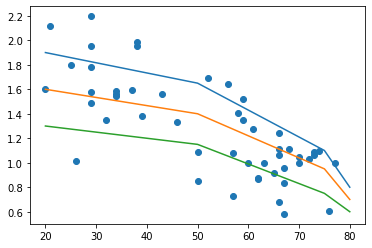

In [ ]:
plt.plot([20, 50, 75, 80], [1.9, 1.65, 1.1, 0.8])
plt.plot([20, 50, 75, 80], [1.6, 1.4, 0.95, 0.7])
plt.plot([20, 50, 75, 80], [1.3,  1.15, 0.75, 0.6])

plt.scatter(ages, [s for s in actual_speeds])
plt.plot()